<a href="https://colab.research.google.com/github/byannurcahyo/2241720134-PCVK-2024/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

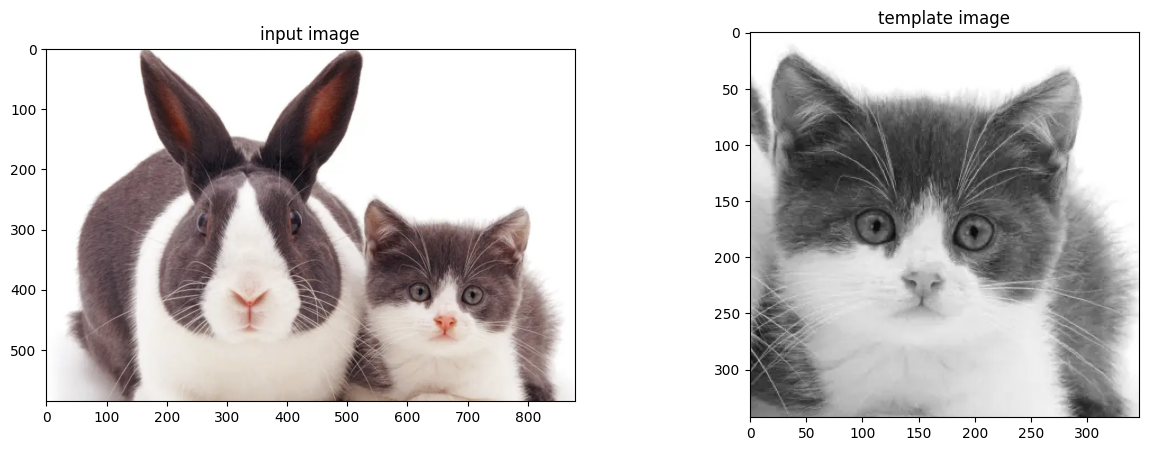

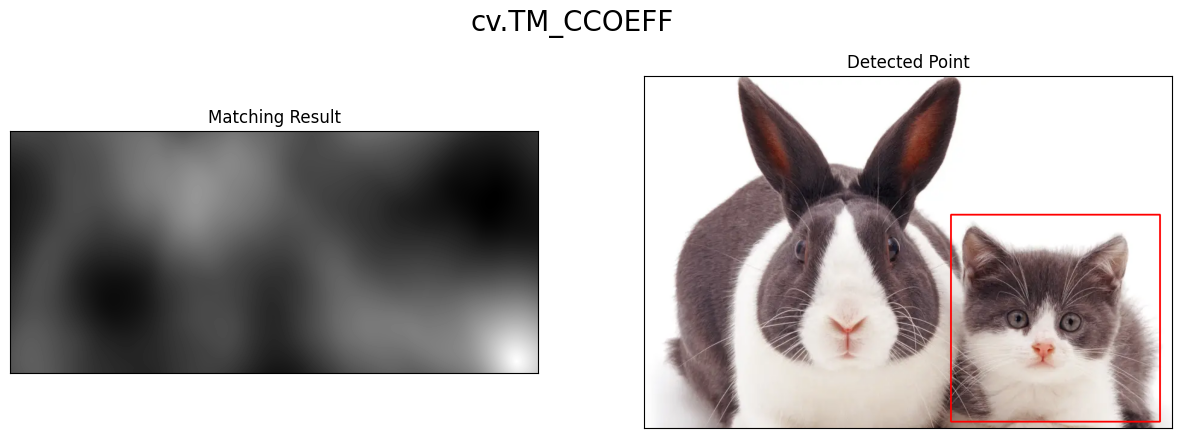

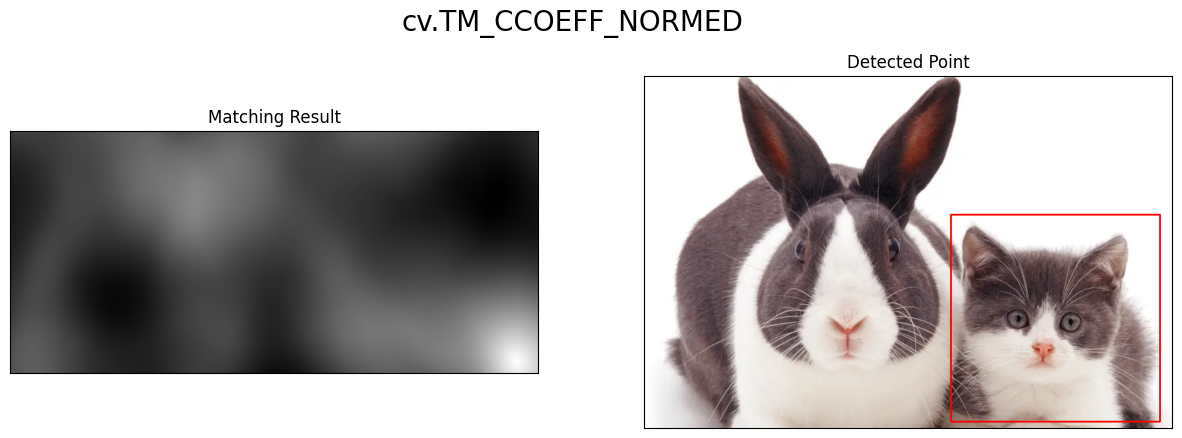

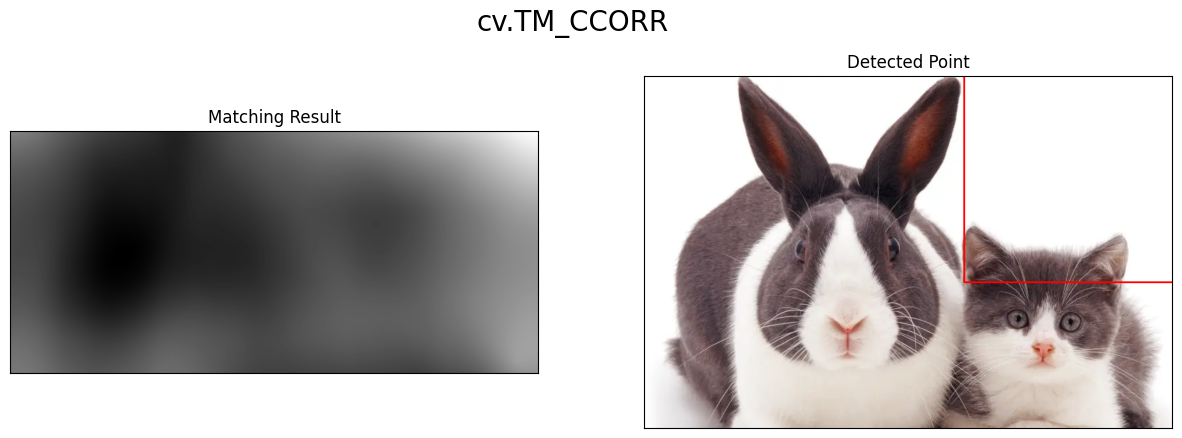

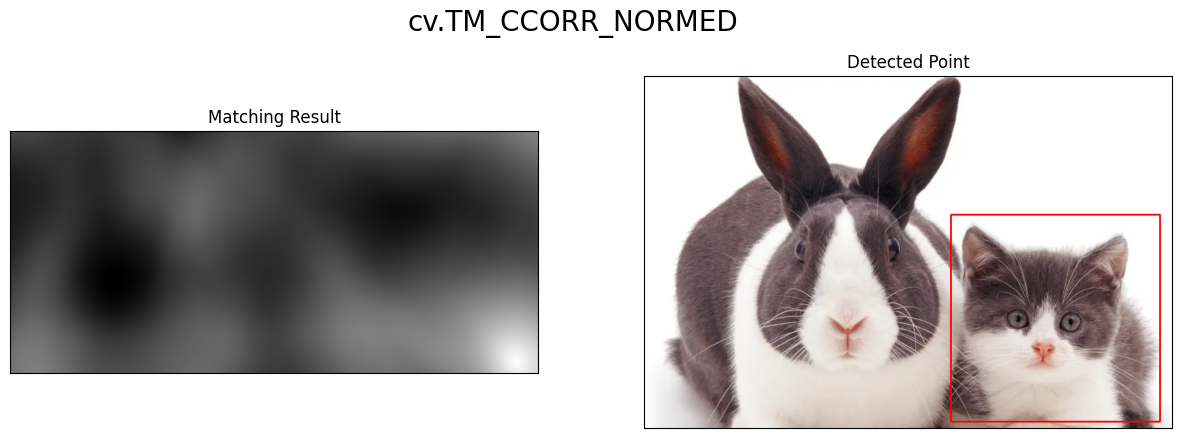

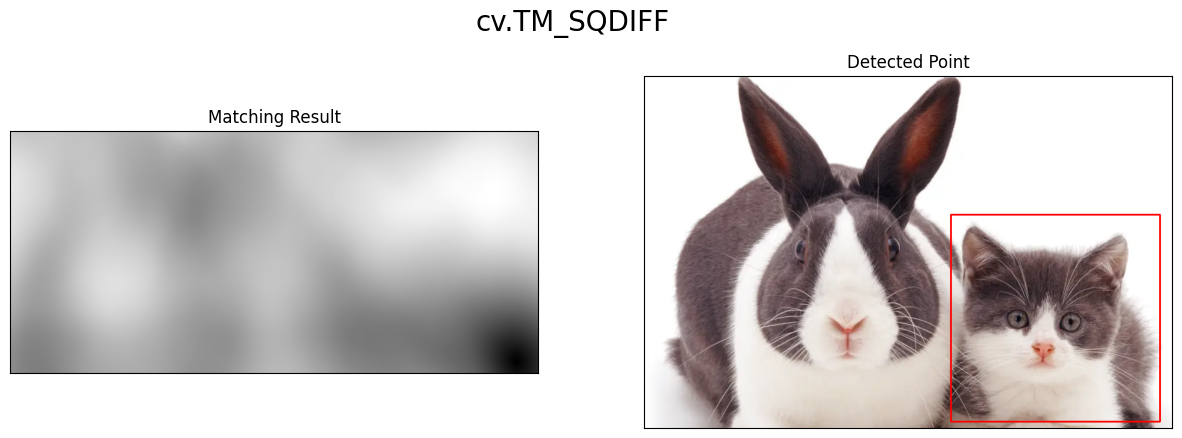

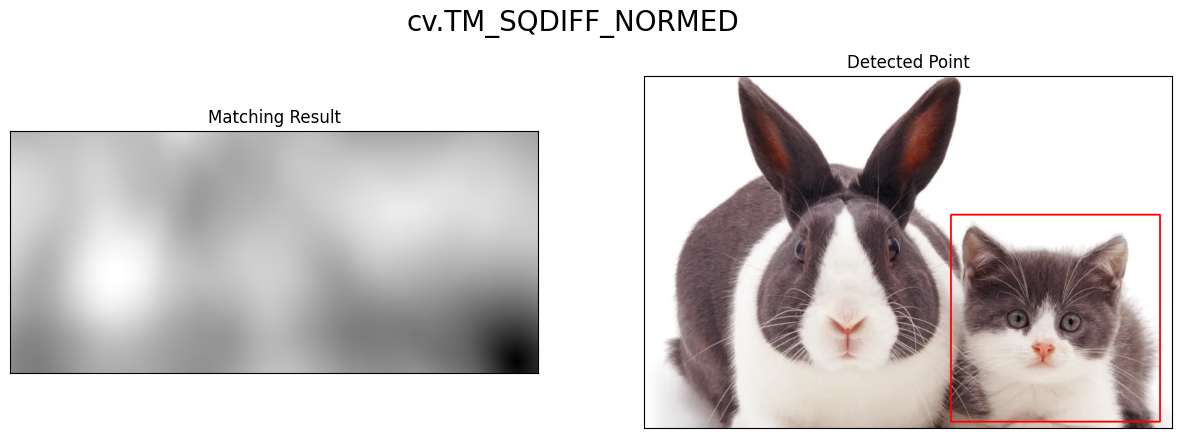

In [9]:
# load image
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img2 = img.copy()

#load citra template
template = cv.imread('/content/drive/MyDrive/PCVK/cats_template.jpg',0)
# dimensi citra
w, h = template.shape[::-1]

# print input image dan template
f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image")
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255),2)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
plt.show()

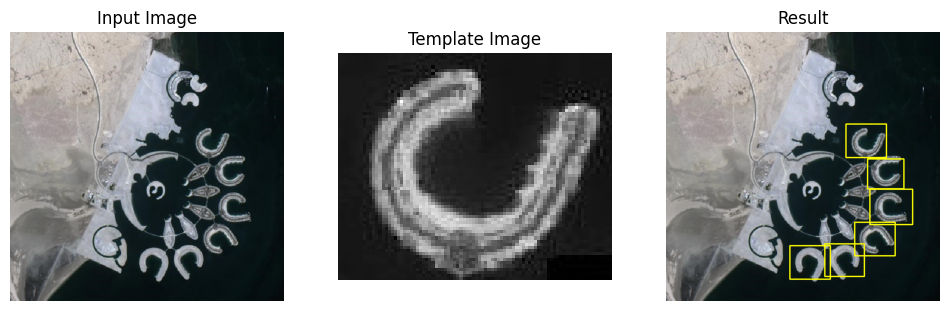

In [29]:
# Load images
img = Image.open('/content/drive/MyDrive/PCVK/Object Detection/bahrain.jpg')
template = Image.open('/content/drive/MyDrive/PCVK/Object Detection/bahrain-template.jpg')

# Convert PIL to OpenCV
def pil_to_cv(pil_image):
    open_cv_image = np.array(pil_image)
    return cv.cvtColor(open_cv_image, cv.COLOR_RGB2BGR)

# Template matching
def match_template(img, template, threshold=0.5):
    image = pil_to_cv(img)
    template_cv = pil_to_cv(template)

    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template_cv, cv.COLOR_BGR2GRAY)

    h, w = template_gray.shape
    image_plot = image.copy()
    rectangles = []

    # Template matching with limited scale
    scales = [0.9, 1.0, 1.1]
    for scale in scales:
        resized_template = cv.resize(template_gray, (int(w * scale), int(h * scale)))
        h_resized, w_resized = resized_template.shape

        res = cv.matchTemplate(image_gray, resized_template, cv.TM_CCOEFF_NORMED)
        res_copy = res.copy()

        # Search threshold
        while True:
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res_copy)
            if max_val < threshold:
                break

            rectangles.append([max_loc[0], max_loc[1], w_resized, h_resized])
            res_copy[max_loc[1]:max_loc[1] + h_resized, max_loc[0]:max_loc[0] + w_resized] = 0

    rectangles, _ = cv.groupRectangles(rectangles, groupThreshold=1, eps=0.3)

    # Print rectangle
    for (x, y, w, h) in rectangles:
        cv.rectangle(image_plot, (x, y), (x + w, y + h), (0, 255, 255), 2)

    # Convert RGB
    image_rgb = cv.cvtColor(image_plot, cv.COLOR_BGR2RGB)

    # Print
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))

    # Input image
    ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    ax[0].set_title('Input Image')
    ax[0].axis('off')

    # Template image
    ax[1].imshow(template_gray, cmap='gray')
    ax[1].set_title('Template Image')
    ax[1].axis('off')

    # Result image
    ax[2].imshow(image_rgb)
    ax[2].set_title('Result')
    ax[2].axis('off')
    plt.show()

match_template(img, template, threshold=0.45)

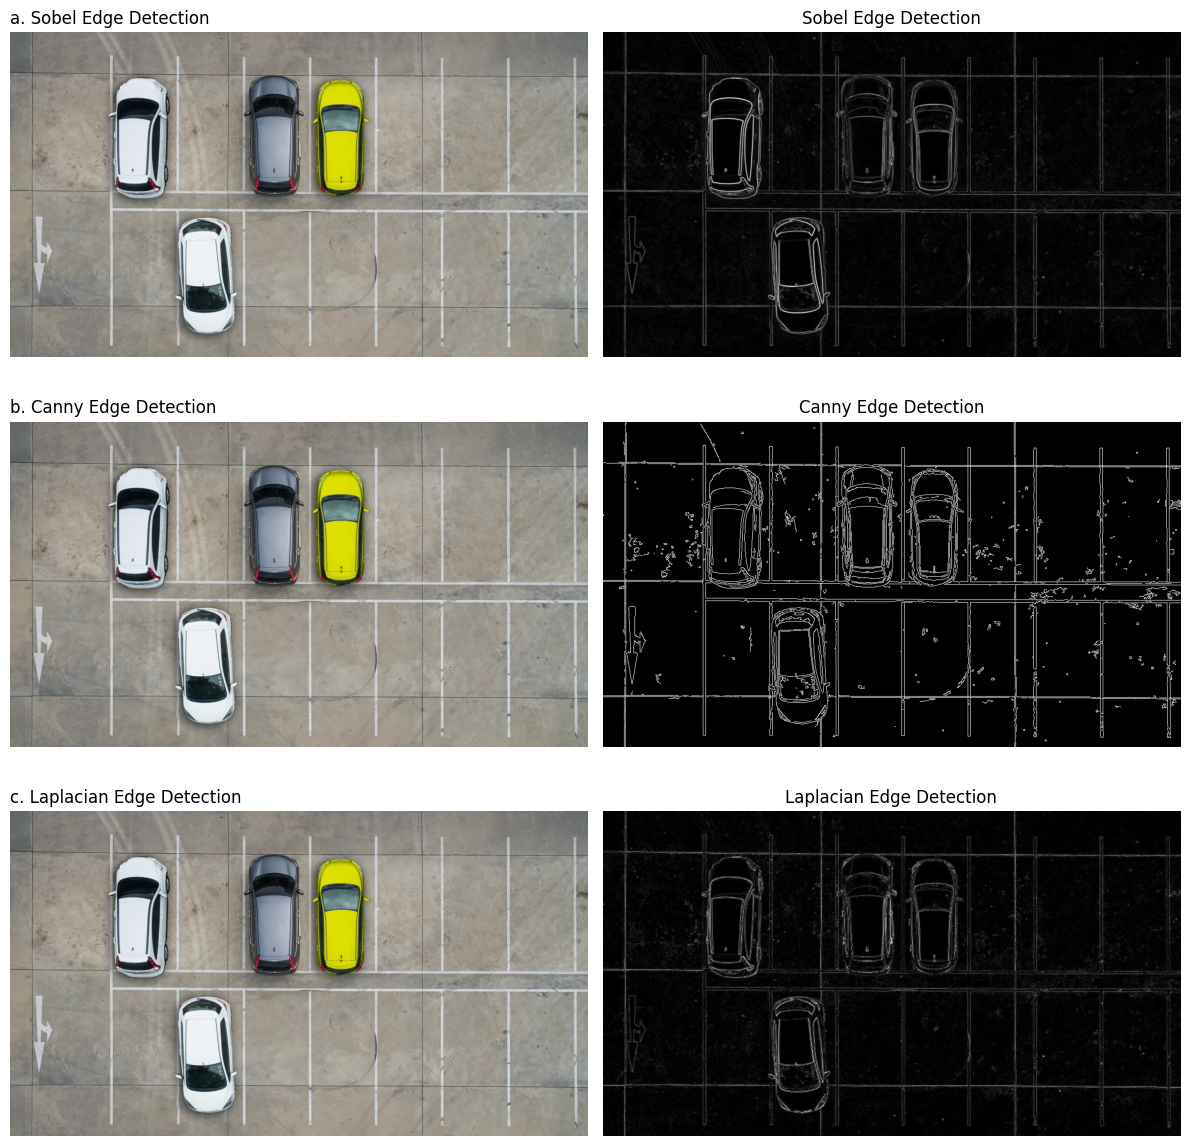

In [30]:
# Read the image
image = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/car-park.jpg')

# Convert to grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv.Sobel(gray_image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(gray_image, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny = cv.Canny(gray_image, 50, 150)

# Laplacian Edge Detection
laplacian = cv.Laplacian(gray_image, cv.CV_64F)
laplacian_edges = np.uint8(np.absolute(laplacian))

# Display the results
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

# a. Sobel Edge Detection
ax[0, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0, 0].set_title("a. Sobel Edge Detection", loc='left')
ax[0, 0].axis('off')
ax[0, 1].imshow(sobel_combined, cmap='gray')
ax[0, 1].set_title("Sobel Edge Detection")
ax[0, 1].axis('off')

# b. Canny Edge Detection
ax[1, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[1, 0].set_title("b. Canny Edge Detection", loc='left')
ax[1, 0].axis('off')
ax[1, 1].imshow(canny, cmap='gray')
ax[1, 1].set_title("Canny Edge Detection")
ax[1, 1].axis('off')

# c. Laplacian Edge Detection
ax[2, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[2, 0].set_title("c. Laplacian Edge Detection", loc='left')
ax[2, 0].axis('off')
ax[2, 1].imshow(laplacian_edges, cmap='gray')
ax[2, 1].set_title("Laplacian Edge Detection")
ax[2, 1].axis('off')

plt.tight_layout()
plt.show()

<ipython-input-51-5af6b3841149>:25: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


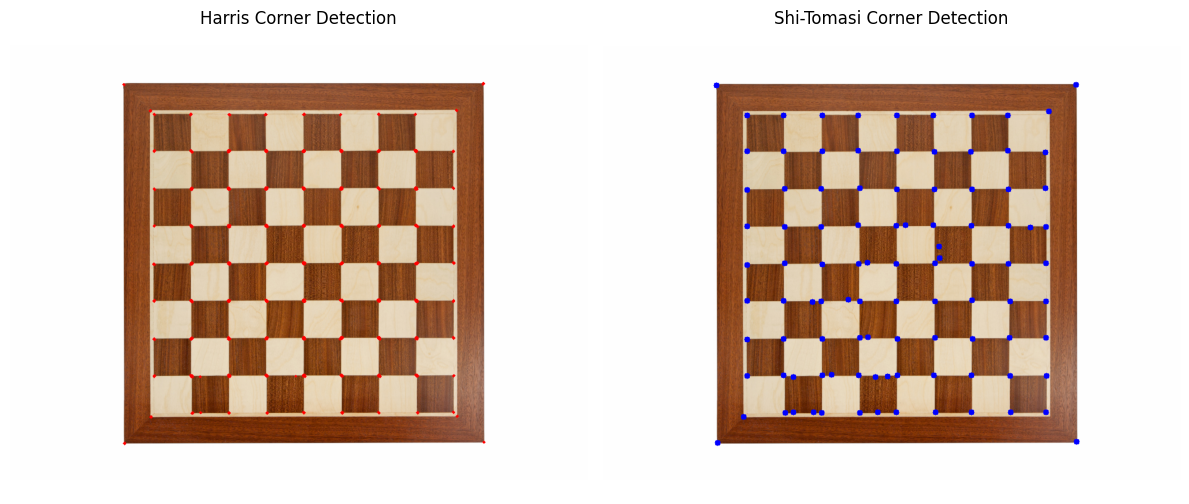

In [51]:
# Read the image
image = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/chess-board.jpg')

# Create copies for each method
image_harris = image.copy()
image_shi_tomasi = image.copy()

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Detect corners using the Harris method
corner_harris = cv.cornerHarris(gray, 2, 3, 0.04)
# Set a threshold to mark strong corners
threshold = 0.01 * corner_harris.max()
# Find locations where corners are detected
harris_points = np.argwhere(corner_harris > threshold)

# Draw thicker corners for Harris detection
for point in harris_points:
    y, x = point
    cv.circle(image_harris, (x, y), 2, (0, 0, 255), -1)  # Red color for Harris

# Detect corners using the Shi-Tomasi method
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.int0(corners)
# Draw corners on the Shi-Tomasi image in blue
for corner in corners:
    x, y = corner.ravel()
    cv.circle(image_shi_tomasi, (x, y), 5, (255, 0, 0), -1)  # Blue color for Shi-Tomasi

# Display the results of Harris and Shi-Tomasi in a single horizontal output
plt.figure(figsize=(12, 6))

# Subplot for Harris Corner Detection
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image_harris, cv.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

# Subplot for Shi-Tomasi Corner Detection
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

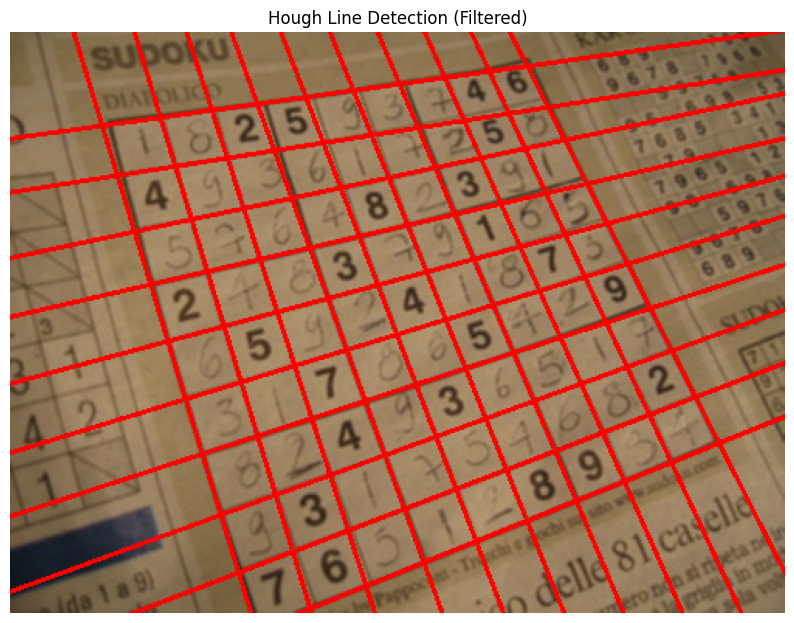

Number of Hough lines: 33
Number of filtered lines: 20


In [52]:
# Read the image
image = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/sudoku.jpg')

# Convert to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Edge detection using Canny Edge Detection
edges = cv.Canny(gray, 90, 150, apertureSize=3)

# Dilate the edge detection result
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

# Erode the dilated result
kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

# Detect lines using Hough Transform
lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

# Check if any lines were detected
if lines is None:
    print('No lines were found')
    exit()

# Filter parameters
rho_threshold = 15
theta_threshold = 0.1

# Filter similar lines
similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = [True] * len(lines)
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue

    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

# Create a list of filtered lines
filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]

# Draw filtered lines on the original image
for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Hough Line Detection (Filtered)')
plt.axis('off')
plt.show()

# Print the number of detected and filtered lines after displaying the image
print('Number of Hough lines:', len(lines))
print('Number of filtered lines:', len(filtered_lines))

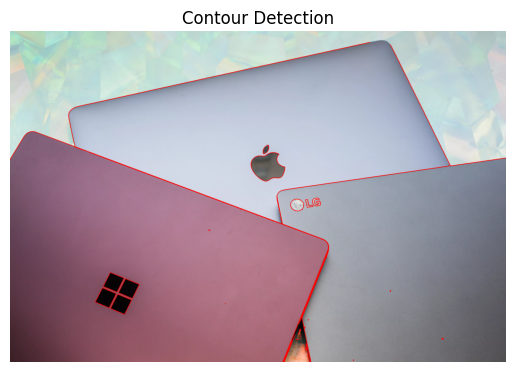

In [53]:
# Read the image
image = cv.imread('/content/drive/MyDrive/PCVK/Object Detection/laptop.jpg')

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
edged = cv.Canny(gray, 30, 200)

# Find contours using findContours
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Draw contours on the original image
cv.drawContours(image, contours, -1, (0, 0, 255), 3)

# Display the contour detection result
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.axis('off')
plt.show()

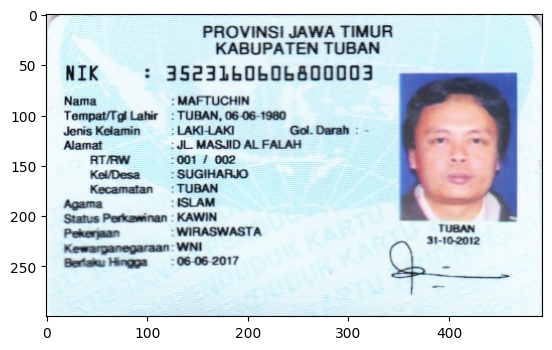

In [61]:
import cv2
import os

image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/KTP_More/ktp3.png')
image = cv2.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

168.0 (300, 493)


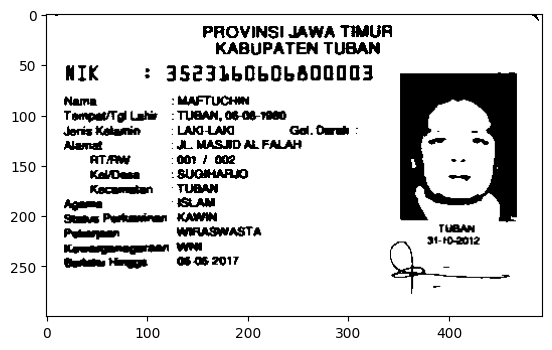

In [66]:
# path file
path_plate = "/content/drive/MyDrive/PCVK/KTP_More/KTP_More/"
image = "ktp3.png"

# Looping file in directory
for name_file in sorted(os.listdir(path_plate)):
  src = cv2.imread(os.path.join(path_plate, image))
  blurred = src.copy()
  gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# Change to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)
plt.imshow(bw, cmap='gray')

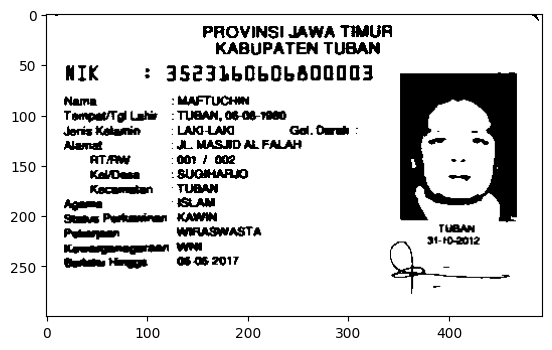

In [68]:
# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)

# Display the result after morphological operations
plt.imshow(bw_opened, cmap='gray')

168.0 (300, 493)


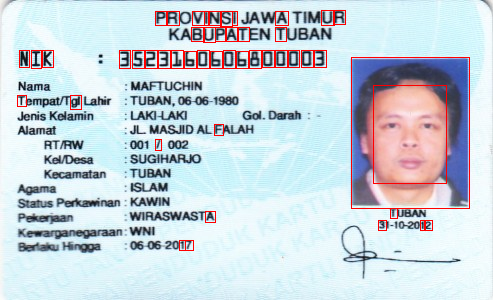

In [70]:
import cv2
from google.colab.patches import cv2_imshow

# path file
path_plate = "/content/drive/MyDrive/PCVK/KTP_More/KTP_More/"
image = "ktp3.png"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, image))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# change to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)


contours,  hierarchy= cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


# Contour drawing on the original image
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display images with contours
cv2_imshow(src)

140.0 (381, 608)


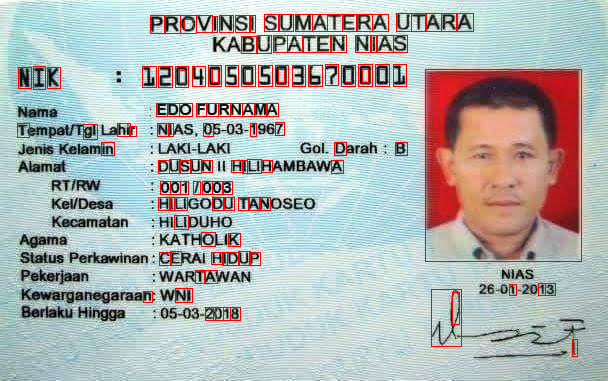

In [71]:
import cv2
from google.colab.patches import cv2_imshow

# path file
path_plate = "/content/drive/MyDrive/PCVK/KTP_More/KTP_More/"
image = "ktp5.png"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, image))
    blurred = src.copy()
    gray = blurred.copy()

# Filtering
for i in range(10):
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

# change to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

# Apply morphological operations (opening) to separate characters or objects
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
bw_opened = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)


contours,  hierarchy= cv2.findContours(bw, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)


# Contour drawing on the original image
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
        cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display images with contours
cv2_imshow(src)